<a href="https://colab.research.google.com/github/anmolbadhan13/Health-Predictive-System/blob/main/heart_disease_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALLING PANDAS-PROFILLING**

In [ ]:
!pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=afe0300fc07041705f3fb9884e845e4494bf26b74e71b5df30728e33688501c8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**IMPORTING ALL IMPORTANT DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport


In [ ]:
# loading the csv data to a pandas
df=pd.read_csv('/content/heart.csv')

In [ ]:
# print first 5 rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last five rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for mssing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**DATA PREPROCESSING**
**AND**
**DATA VISUALIZATION**

In [ ]:
profile=ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
## drop one duplicates line
df=df.drop_duplicates()
df.shape

(302, 14)

In [ ]:
## statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

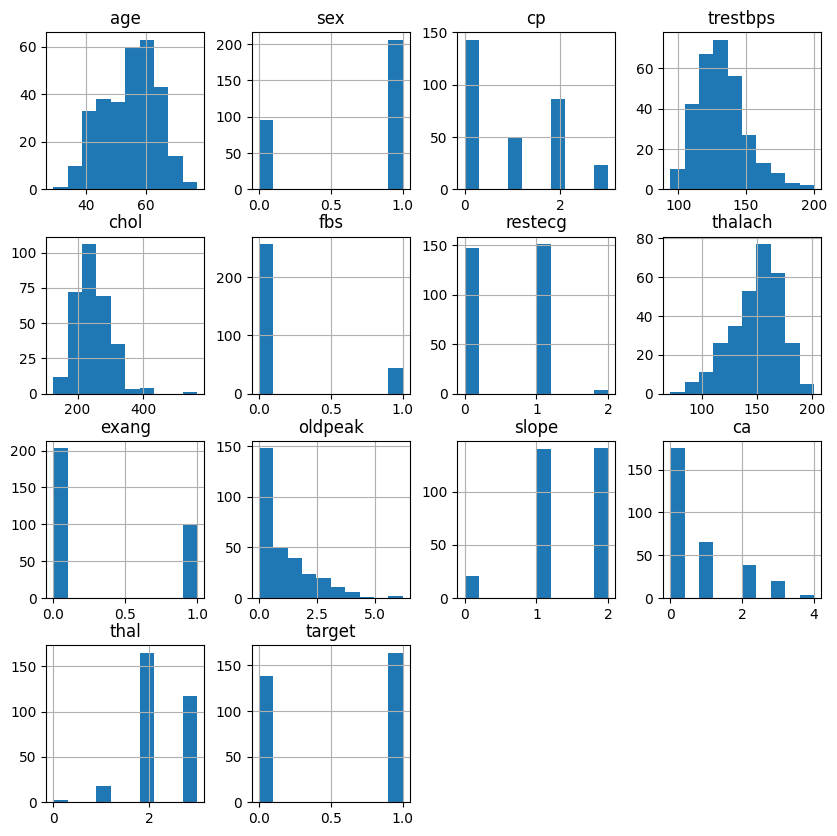

In [ ]:
# creating the histograms for all column
df.hist(figsize=(10,10))
plt.show()

#there are 9 columns which
# are indeed numerical in terms of data type, but categorical in terms of their semantics. These features should be converted to string (object) data type for proper analysis and interpretation:

In [ ]:
# define the continous feature
continous_features=['age','trestbps','chol','thalach','oldpeak']

# identify the features to be converted to object data type
features_to_convert=[feature for feature in df.columns if feature not in continous_features]

# convert the features to object data type
df[features_to_convert]=df[features_to_convert].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 35.4+ KB


<ipython-input-16-a6d99f8f82ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_convert]=df[features_to_convert].astype('object')


In [ ]:
# statistsics for numerical variables
df.describe(include=['int64','float64'])

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [ ]:
# statistsics for categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,206,143,257,151,203,141,175,165,164


It seems that all features are relevent

# Outlier Treatment

In [ ]:
# using IQR method to check outliers for continous features
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
Q1 = df[continous_features].quantile(0.25) #Calculate the first quartile (25th percentile)
Q3 = df[continous_features].quantile(0.75)#third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_count = ((df[continous_features] < (Q1 - 1.5 * IQR)) | (df[continous_features] > (Q3 + 1.5 * IQR))).sum()
outliers_count

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [ ]:
## removing outliers
# we will apply tranformations like ROBUST-SCALING
# to rduce the impact of outliers and make data
# direct removal of outliers is not best approach
# because our dataset is too small

**Categorical Features Encoding**

need one hot encoding-->cp,restecg,thal


dont need one hot encoding-->sex,fbs,exang,slope,ca

In [ ]:
df_1=pd.get_dummies(df,columns=['cp','restecg','thal'],drop_first=True)

# converting rst of the categorical variables
# that dont need one hot encoding to integer data type
features_to_convert=['sex','fbs','exang','slope','ca','target']
for feature in features_to_convert:
  df_1[feature]=df_1[feature].astype('int')

df_1.sample(7)



,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
250,51,1,140,298,0,122,1,4.2,1,3,0,False,False,False,True,False,False,False,True
143,67,0,106,223,0,142,0,0.3,2,2,1,False,False,False,True,False,False,True,False
162,41,1,120,157,0,182,0,0.0,2,0,1,True,False,False,True,False,False,True,False
176,60,1,117,230,1,160,1,1.4,2,2,0,False,False,False,True,False,False,False,True
123,54,0,108,267,0,167,0,0.0,2,0,1,False,True,False,False,False,False,True,False
272,67,1,120,237,0,71,0,1.0,1,0,0,False,False,False,True,False,False,True,False
81,45,1,128,308,0,170,0,0.0,2,0,1,True,False,False,False,False,False,True,False


In [ ]:
df_1.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

**Splitting the features and target**

In [ ]:
X=df_1.drop(columns='target',axis=1)# whenever you drop columns axis=1
# or whenever any row axis =0
y=df_1['target']

In [ ]:
# sacling using robust scaler
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=scaler.fit_transform(X)

In [ ]:
print(X[:3])

[[ 0.57692308  0.          0.75       -0.11764706  1.         -0.07633588
   0.          0.9375     -1.          0.          0.          0.
   1.         -0.5         0.          1.         -1.          0.        ]
 [-1.42307692  0.          0.          0.14901961  0.          1.05343511
   0.          1.6875     -1.          0.          0.          1.
   0.          0.5         0.          0.          0.          0.        ]
 [-1.11538462 -1.          0.         -0.57254902  0.          0.59541985
   0.          0.375       1.          0.          1.          0.
   0.         -0.5         0.          0.          0.          0.        ]]


In [ ]:
from sklearn.preprocessing import  LabelEncoder
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [ ]:
y.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
# using technique(OVER SAMPLING MINORITY CLASS USING SMOTE) to
# handle imbalance data
from imblearn.over_sampling import SMOTE

# Check the shapes of X and y before applying SMOTE
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

Shape of X: (302, 18)
Shape of y: (302,)


In [ ]:
print(X_sm.shape,y_sm.shape)
print(y_sm.value_counts())

(328, 18) (328,)
target
1    164
0    164
Name: count, dtype: int64


**spliting the data into training data and test data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(302, 18) (262, 18) (66, 18)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(302,) (262,) (66,)


In [ ]:
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**MODEL SELECTION**

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def find_best_classification_model_using_gridsearchcv(X, y):
    algos = {
        "logistic_regression": {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [1, 5, 10],
                'solver': ['lbfgs', 'newton-cg', 'liblinear'],
                'penalty': ['l2', 'none']
            }
        },
        "random_forest": {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy']
            }
        },
        "SVM": {
            'model': svm.SVC(gamma='auto'),
            'params': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        },
        "KNN": {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5, 10, 15],
                'algorithm': ['ball_tree', 'kd_tree', 'auto'],
                'p': [1, 2]
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (assuming X and y are defined):
# results = find_best_classification_model_using_gridsearchcv(X, y)
# print(results)
find_best_classification_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

,model,best_score,best_params
0,logistic_regression,0.845902,"{'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,random_forest,0.816393,"{'criterion': 'gini', 'n_estimators': 100}"
2,SVM,0.862295,"{'C': 10, 'kernel': 'linear'}"
3,KNN,0.845902,"{'algorithm': 'ball_tree', 'n_neighbors': 15, ..."


In [ ]:
#there fore we will use SVM algorith for fitting
#our model

**Model Training USING**
**SVM**

In [ ]:
model=svm.SVC(C=10,kernel="linear")

In [ ]:
# trainijng the svm model with traing data
model.fit(X_train,y_train)

SVC(C=10, kernel='linear')

**MODEL EVALUATION AND ACCURACY**

In [ ]:
prediction_train=model.predict(X_train)
training_score=accuracy_score(y_train,prediction_train)

In [ ]:
print(" Accuracy of model on training data :", training_score)

 Accuracy of model on training data : 0.8587786259541985


In [ ]:
prediction_test=model.predict(X_test)
test_score=accuracy_score(y_test,prediction_test)

In [ ]:
print(" Accuracy of model on test data :", test_score)

 Accuracy of model on test data : 0.803030303030303


In [ ]:
# logistic regression
model_1=LogisticRegression(C=5,penalty='l2',solver="lbfgs")

In [ ]:
# trainijng the logistic model with traing data
model_1.fit(X_train,y_train)

LogisticRegression(C=5)

In [ ]:
prediction_train_1=model_1.predict(X_train)
training_score_1=accuracy_score(y_train,prediction_train_1)

In [ ]:
print(" Accuracy of model on training data :", training_score_1)

 Accuracy of model on training data : 0.8702290076335878


In [ ]:
prediction_test_1=model_1.predict(X_test)
test_score_1=accuracy_score(y_test,prediction_test_1)

In [ ]:
print(" Accuracy of model on test data :", test_score_1)

 Accuracy of model on test data : 0.8181818181818182


In [ ]:
# there for we will use logistic regression

**PREDICTIVE SYSTEM**

In [ ]:
input_data=(50,1,140,233,0,163,0,0.6,1.1,0,0,1,0,1,0,0,0,1)

# change the input data to a numpy array
input_array_as_numpy_array=np.asarray(input_data)

## reshape the array as we are predicting for only one instance
input_data_reshaped=input_array_as_numpy_array.reshape(1,-1)

# standardize the data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=model.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print("The person does not have a heart disease")
else:
  print("The person has a heart disease")

[[-0.42307692  0.          0.5        -0.11764706  0.          0.32061069
   0.         -0.125       0.1         0.          0.          1.
   0.          0.5         0.          0.         -1.          1.        ]]
[1]
The person has a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


**CONFUSION MATRIX**


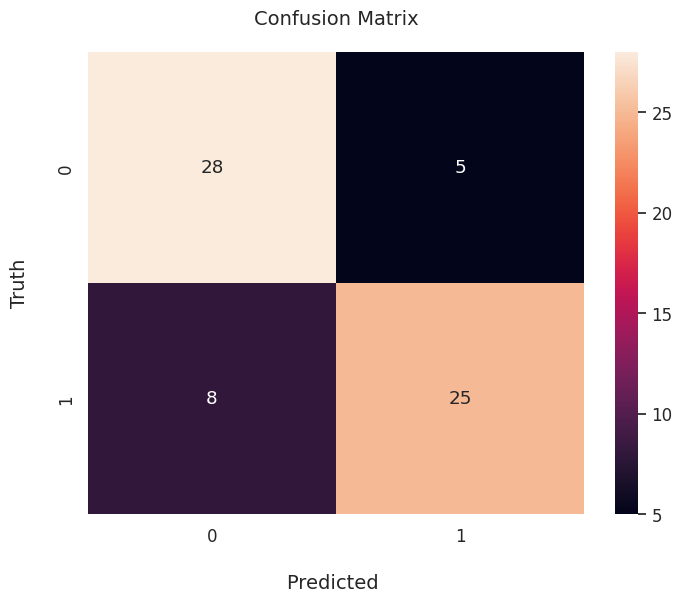

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, prediction_test)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()


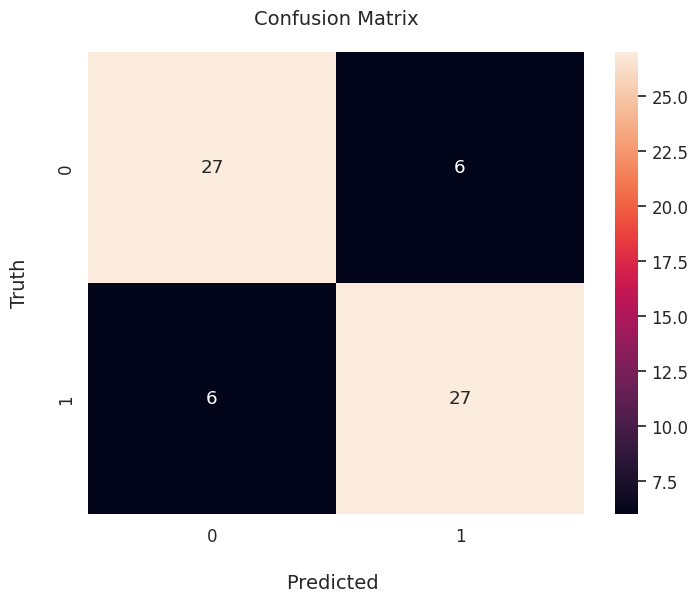

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, prediction_test_1)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.83      0.76      0.79        33

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test_1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.82      0.82      0.82        33

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



**SAVING THE MODEL**

In [ ]:
import pickle
filename = 'heart.pkl'
pickle.dump(model_1, open(filename, 'wb'))